<a href="https://colab.research.google.com/github/Diacod-I/TSF-GRIP-May-2023/blob/main/Task%231/TSF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook for done by Advith Krishnan for The Sparks Foundation GRIP Internship program.

## Importing dataset

Using the ```!wget``` command, we can retrieve the dataset directly from the link provided..



In [ ]:
!wget https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

--2023-05-14 06:51:56--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2023-05-14 06:51:56 (9.67 MB/s) - ‘student_scores - student_scores.csv’ saved [212/212]



## Importing Modules

Now we will import the relevant modules for this project, which are ```pandas``` and ```numpy``` for data manipulation, ```matplotlib``` and ```seaborn``` for visualization, ```sklearn``` for model development and evaluation. We will also use ```warnings.fiterwarnings("ignore")``` to ignore any warnings related to Deprecation and No Labels to input data for certain functions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

Read the dataset csv file to a DataFrame object

In [ ]:
studentdata = pd.read_csv("/content/student_scores - student_scores.csv")

In [ ]:
studentdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
studentdata.count()

Hours     25
Scores    25
dtype: int64

In [ ]:
studentdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

In [ ]:
plt.style.use("dark_background")

Scatter plot of the data represents the data and thier relationship. We can see a upward linear trend with the given data.

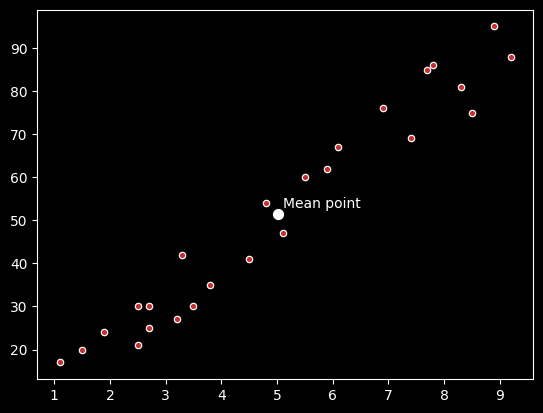

In [ ]:
plt.scatter(studentdata.Hours,studentdata.Scores,c='white',s=20)
plt.scatter(studentdata.Hours,studentdata.Scores,c='tab:red',s=7)
plt.scatter(5.012,51.48,c="white",s=50)
plt.text(5.1,53,"Mean point")
plt.show()

Distribution of values can be represented through the kernel density estimation plot, as shown below.

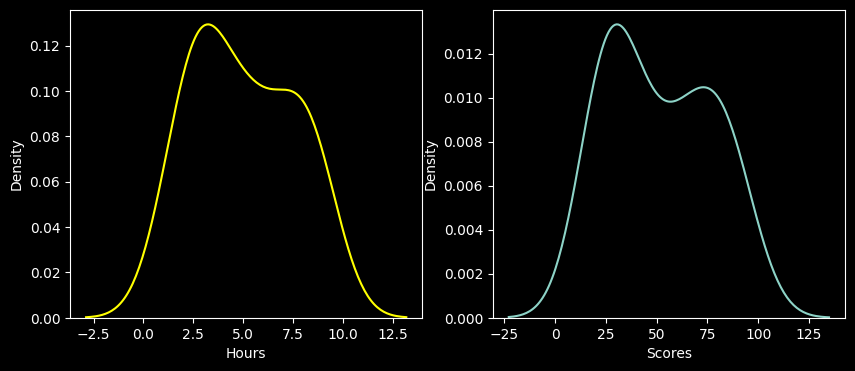

In [ ]:
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(studentdata.Hours,c="yellow")
plt.subplot(1,2,2)
sns.kdeplot(studentdata.Scores)
plt.show()

We can also compare both distributions as shown below.

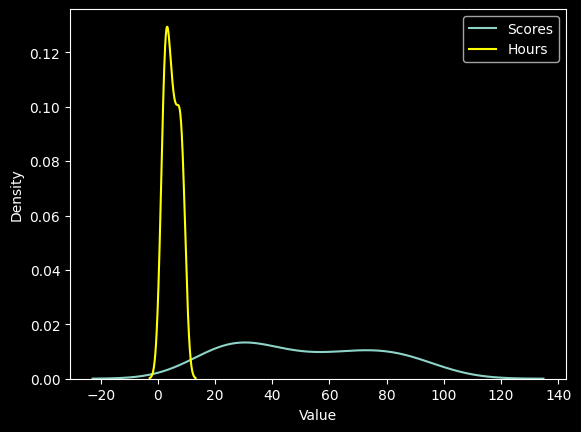

In [ ]:
sns.kdeplot(studentdata.Scores,label="Scores")
sns.kdeplot(studentdata.Hours,label="Hours",c="yellow")
plt.xlabel("Value")
plt.legend()
plt.show()

We shall also see the trend of data by showing the ordered connection of points which gives a very noisy trend of data. To better understand and visualize the rise in Score vs Hours per day, Running Average is also plotted with the data.

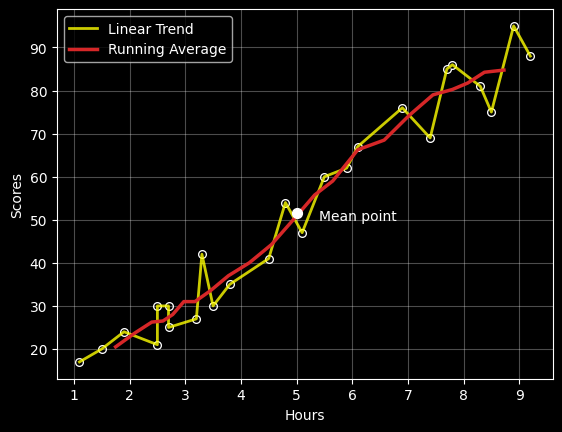

In [ ]:
runx = [np.mean((sorted(studentdata.Hours))[ind:ind+4]) for ind in range(len(studentdata.Hours)-4+1)]
runy = [np.mean((studentdata.Scores[np.argsort(np.array(studentdata.Hours))])[ind:ind+4]) for ind in range(len(studentdata.Hours)-4+1)]
plt.plot(sorted(np.array(studentdata.Hours)),studentdata.Scores[np.argsort(np.array(studentdata.Hours))],color="yellow",linewidth=2,label="Linear Trend",alpha=0.8)
plt.plot(runx,runy,color="tab:red",linewidth=2.5,label="Running Average")
plt.scatter(studentdata.Hours,studentdata.Scores,c='white',s=30)
plt.scatter(studentdata.Hours,studentdata.Scores,c='black',s=13)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(5.012,51.48,c="white",s=50,zorder=5)
plt.text(5.4,50,"Mean point")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Linear Regression Model

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(studentdata[['Hours']],studentdata.Scores,test_size=0.2)

In [ ]:
linmodel = LinearRegression()
linmodel.fit(Xtrain,Ytrain)

LinearRegression()

In [ ]:
Ypred = linmodel.predict(Xtest)
print(Ypred)

[88.70295726 59.51044523 26.42559827 45.88727296 34.21026814]


As for the question asked in Task #1 description, the following shows the predicted value of score for 9.25 hours/day.

In [ ]:
print("Estimation of score in exam upon studying for 9.25 hours/day = %.4f" % linmodel.predict([[9.25]])[0])

Estimation of score in exam upon studying for 9.25 hours/day = 92.1088


Therefore, the student can expect a score of around 90.4 percentage in thier exams if they study 9.25 hours a day

## Model evaluation

The following shows the plot of comparison between the linear regressor model and the running average of all the points, along with a comparison between the actual and predicted values.

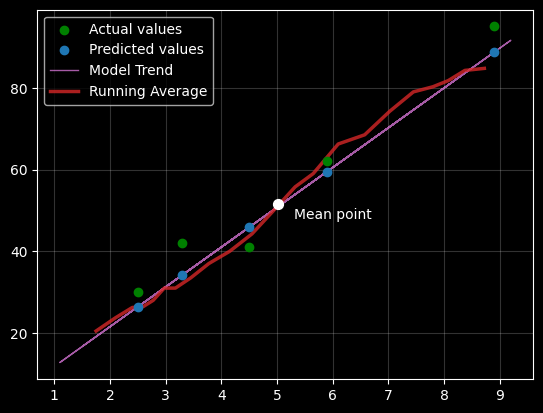

In [ ]:
Ypred = linmodel.predict(Xtest)
line = linmodel.coef_*studentdata.Hours + linmodel.intercept_
plt.scatter(Xtest,Ytest,label="Actual values",c="green",zorder=4)
plt.scatter(Xtest,Ypred,label="Predicted values",c="tab:blue",zorder=5)
plt.plot(studentdata.Hours,line,linewidth=1,c="violet",alpha=0.7,label="Model Trend")
plt.plot(runx,runy,color="tab:red",linewidth=2.5,label="Running Average",alpha=0.8)
plt.scatter(5.012,51.48,c="white",s=50,zorder=7)
plt.text(5.3,48,"Mean point")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

From the above plot, we can see that the model has managed to encapsulate most of the trend and best fits to the data. While there is some error to the predication, it is not substantial.

We evaluate with different metrics. First we show the most common metric, which will be our best method evaluation, the R-Squared error.

In [ ]:
print("R-squared score = %.4f"%(100*linmodel.score(Xtest,Ytest)))

R-squared Error = 94.5637


The R-Squared score shows an estimated 94% prediction accuracy from the model for the test data.

The following represent other forms of evaluation such as Mean Squared error, Root Mean Squared error, Mean Absolute error and Mean Absolute Percentage Error. 

In [ ]:
print("Mean Squared Error = %.4f" % mean_squared_error(Ytest,Ypred),"\n")
print("Root Mean Squared Error = %.4f" % sqrt(mean_squared_error(Ytest,Ypred)),"\n")
print("Mean Absolute Error = %.4f" % mean_absolute_error(Ytest,Ypred),"\n")
print("Mean Absolute Percentage Error = %.4f" % mean_absolute_percentage_error(Ytest,Ypred),"\n")

Mean Squared Error = 28.6385 

Root Mean Squared Error = 5.3515 

Mean Absolute Error = 5.0076 

Mean Absolute Percentage Error = 0.1061 



We can hence see that overall the error values are fairly low and show a good result for model training.